In [1]:
import os
from nbodykit import style
import matplotlib.pyplot as plt
plt.style.use(style.notebook)

In [2]:
from nbodykit.binned_statistic import BinnedStatistic

data_dir = os.path.join(os.path.abspath('.'), 'data')
power_1d = BinnedStatistic.from_json(os.path.join(data_dir, 'dataset_1d.json'))
power_2d = BinnedStatistic.from_json(os.path.join(data_dir, 'dataset_2d.json'))

In [3]:
print("1D shape = ", power_1d.shape)
print("2D shape = ", power_2d.shape)

1D shape =  (64,)
2D shape =  (64, 5)


In [4]:
print("1D dims = ", power_1d.dims)
print("2D dims = ", power_2d.dims)

1D dims =  ['k']
2D dims =  ['k', 'mu']


In [5]:
print("2D edges = ", power_2d.coords)

2D edges =  {'k': array([ 0.00613593,  0.01840777,  0.03067962,  0.04295147,  0.05522331,
        0.06749516,  0.079767  ,  0.09203884,  0.10431069,  0.11658255,
        0.1288544 ,  0.14112625,  0.1533981 ,  0.1656699 ,  0.17794175,
        0.1902136 ,  0.20248545,  0.2147573 ,  0.22702915,  0.239301  ,
        0.25157285,  0.2638447 ,  0.27611655,  0.2883884 ,  0.30066025,
        0.3129321 ,  0.32520395,  0.3374758 ,  0.3497476 ,  0.36201945,
        0.3742913 ,  0.38656315,  0.398835  ,  0.41110685,  0.4233787 ,
        0.43565055,  0.4479224 ,  0.46019425,  0.4724661 ,  0.48473795,
        0.4970098 ,  0.5092816 ,  0.52155345,  0.5338253 ,  0.54609715,
        0.558369  ,  0.57064085,  0.5829127 ,  0.59518455,  0.6074564 ,
        0.61972825,  0.6320001 ,  0.64427195,  0.6565438 ,  0.6688156 ,
        0.68108745,  0.6933593 ,  0.70563115,  0.717903  ,  0.73017485,
        0.7424467 ,  0.75471855,  0.7669904 ,  0.77926225]), 'mu': array([ 0.1,  0.3,  0.5,  0.7,  0.9])}


In [6]:
print("2D edges = ", power_2d.edges)

2D edges =  {'k': array([ 0.        ,  0.01227185,  0.02454369,  0.03681554,  0.04908739,
        0.06135923,  0.07363108,  0.08590292,  0.09817477,  0.1104466 ,
        0.1227185 ,  0.1349903 ,  0.1472622 ,  0.159534  ,  0.1718058 ,
        0.1840777 ,  0.1963495 ,  0.2086214 ,  0.2208932 ,  0.2331651 ,
        0.2454369 ,  0.2577088 ,  0.2699806 ,  0.2822525 ,  0.2945243 ,
        0.3067962 ,  0.319068  ,  0.3313399 ,  0.3436117 ,  0.3558835 ,
        0.3681554 ,  0.3804272 ,  0.3926991 ,  0.4049709 ,  0.4172428 ,
        0.4295146 ,  0.4417865 ,  0.4540583 ,  0.4663302 ,  0.478602  ,
        0.4908739 ,  0.5031457 ,  0.5154175 ,  0.5276894 ,  0.5399612 ,
        0.5522331 ,  0.5645049 ,  0.5767768 ,  0.5890486 ,  0.6013205 ,
        0.6135923 ,  0.6258642 ,  0.638136  ,  0.6504079 ,  0.6626797 ,
        0.6749515 ,  0.6872234 ,  0.6994952 ,  0.7117671 ,  0.7240389 ,
        0.7363108 ,  0.7485826 ,  0.7608545 ,  0.7731263 ,  0.7853982 ]), 'mu': array([ 0. ,  0.2,  0.4,  0.6,  0.8,  

In [7]:
print("1D variables = ", power_1d.variables)
print("2D variables = ", power_2d.variables)

1D variables =  ['power', 'k', 'mu', 'modes']
2D variables =  ['power', 'k', 'mu', 'modes']


In [8]:
# the real component of the 1D power
Pk = power_1d['power'].real
print(type(Pk), Pk.shape, Pk.dtype)

# complex power array
Pkmu = power_2d['power']
print(type(Pkmu), Pkmu.shape, Pkmu.dtype)

<class 'numpy.ndarray'> (64,) float64
<class 'numpy.ndarray'> (64, 5) complex128


In [9]:
print("attrs = ", power_2d.attrs)

attrs =  {'N1': 4033, 'Lx': 512.0, 'Lz': 512.0, 'N2': 4033, 'Ly': 512.0, 'volume': 134217728.0}


In [10]:
# select the first mu bin
print(power_2d[:,0])

<BinnedStatistic: dims: (k: 64), variables: ('power', 'k', 'mu', 'modes')>


In [11]:
# select the first and last mu bins
print(power_2d[:, [0, -1]])

<BinnedStatistic: dims: (k: 64, mu: 2), variables: ('power', 'k', 'mu', 'modes')>


In [12]:
# select the first 5 k bins
print(power_1d[:5])

<BinnedStatistic: dims: (k: 5), variables: ('power', 'k', 'mu', 'modes')>


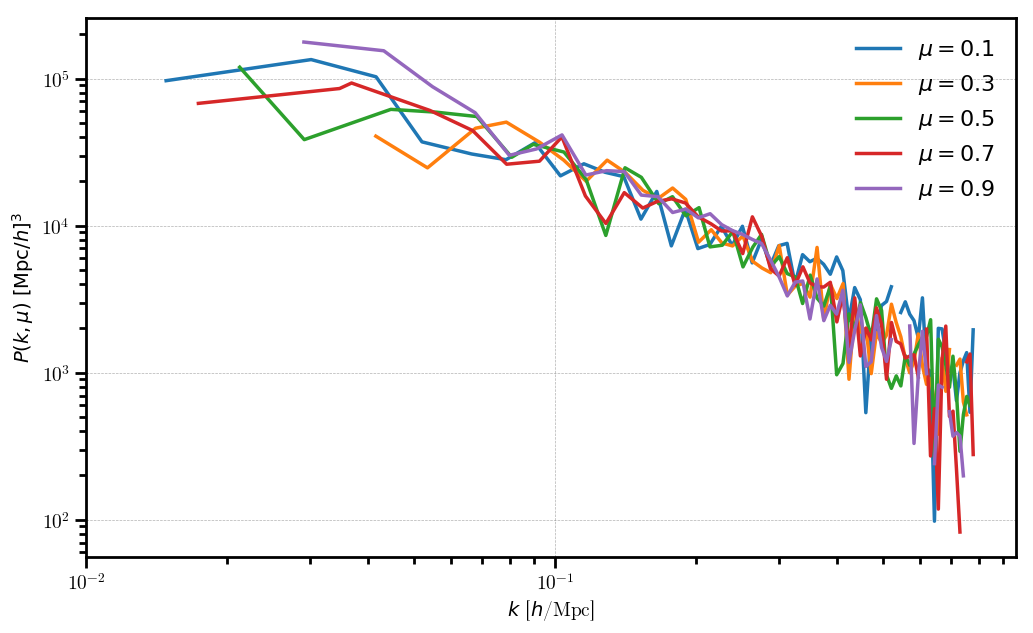

In [13]:
from matplotlib import pyplot as plt

# the shot noise is volume / number of objects
shot_noise = power_2d.attrs['volume'] / power_2d.attrs['N1']

# plot each mu bin separately
for i in range(power_2d.shape[1]):
    pk = power_2d[:,i]
    label = r"$\mu = %.1f$" % power_2d.coords['mu'][i]
    plt.loglog(pk['k'], pk['power'].real - shot_noise, label=label)

plt.legend()
plt.xlabel(r"$k$ [$h$/Mpc]", fontsize=14)
plt.ylabel(r"$P(k,\mu)$ $[\mathrm{Mpc}/h]^3$", fontsize=14)
plt.show()

In [14]:
# get all mu bins for the k bin closest to k=0.1
print(power_2d.sel(k=0.1, method='nearest'))

<BinnedStatistic: dims: (mu: 5), variables: ('power', 'k', 'mu', 'modes')>


In [15]:
# slice from k=0.01-0.1 for mu = 0.5
print(power_2d.sel(k=slice(0.01, 0.1), mu=0.5, method='nearest'))

<BinnedStatistic: dims: (k: 8), variables: ('power', 'k', 'mu', 'modes')>


In [16]:
# get all mu bins for the k bin closest to k=0.1, but keep k dimension
sliced = power_2d.sel(k=[0.1], method='nearest')
print(sliced)

<BinnedStatistic: dims: (k: 1, mu: 5), variables: ('power', 'k', 'mu', 'modes')>


In [17]:
# and then squeeze to remove the k dimension
print(sliced.squeeze())

<BinnedStatistic: dims: (mu: 5), variables: ('power', 'k', 'mu', 'modes')>


In [18]:
# re-index into wider k bins
print(power_2d.reindex('k', 0.02))

<BinnedStatistic: dims: (k: 32, mu: 5), variables: ('power', 'k', 'mu', 'modes')>


/Users/nhand/Research/Programs/nbodykit/nbodykit/binned_statistic.py:56: RuntimeWarning: Mean of empty slice
  ndarray = operation(ndarray, axis=-1*(i+1))


In [19]:
# re-index into wider mu bins
print(power_2d.reindex('mu', 0.4))

<BinnedStatistic: dims: (k: 64, mu: 2), variables: ('power', 'k', 'mu', 'modes')>


/Users/nhand/Research/Programs/nbodykit/nbodykit/binned_statistic.py:56: RuntimeWarning: Mean of empty slice
  ndarray = operation(ndarray, axis=-1*(i+1))


In [20]:
# compute P(k) from P(k,mu)
print(power_2d.average('mu'))

<BinnedStatistic: dims: (k: 64), variables: ('power', 'k', 'mu', 'modes')>


/Users/nhand/Research/Programs/nbodykit/nbodykit/binned_statistic.py:56: RuntimeWarning: Mean of empty slice
  ndarray = operation(ndarray, axis=-1*(i+1))
